In [1]:
import sys
!{sys.executable} -m pip install citipy

In [2]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests

In [3]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [4]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [5]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

38.56684205266788 124.04733233133754
35.312926697217364 -50.727741410632746
-69.90977458921165 118.01840840348842
-37.87497260138801 -67.105661628149
-50.43537006228655 82.0441880881682
53.74818158114584 -4.828235785897789
79.2790790572131 23.42540342244132
-56.054099871824484 -83.55202012990699
-89.38689166560269 55.913010699836036
38.80540157731832 -108.53051449665409
-24.291069222275112 2.2480694206767566
-15.070167860930127 140.73320401297468
63.88763705533458 -54.292898241505824
51.87359310433669 -87.75822443422754
87.62737085985376 84.76951040043815
19.889470975787248 -76.36274980073748
-35.10968606357758 56.88153635941751
61.72105167319938 -94.52818778575356
-66.8398301144444 138.3458043611593
-19.88489917233062 138.57186755825268
0.9779445401153737 40.60617226672184
-82.14094002790706 138.42662611257362
20.169235496222953 113.95799719550081
84.5728116882091 90.95116146505808
-47.31957299879699 57.568956528946785
-21.839199228975204 86.70385576815153
51.34350626451106 90.8865888

-58.238268120010666 2.5724534939580224
-67.39115474449449 -101.29233883451181
-71.93713875287482 165.89231862723915
33.54908114458074 -60.82293556624593
75.76382728029702 144.02178633410387
-78.32220504049454 156.17077826694526
61.826489256125086 69.94362066062504
-62.13965701239508 -5.467658780849234
-66.01956639126246 167.9721616479572
-21.189807265245094 82.03114438737947
-8.533770531440013 -36.312329753794984
-22.153188697985357 -129.46203209527533
-31.120365038373286 164.06592257943703
-28.969448130461053 168.05635777646887
-11.66316243406446 156.15341659105445
-41.417545269759096 118.51359691080086
-66.52029925365042 -20.927796192304385
19.86088373109095 71.19765177450392
59.797614372665436 -127.70532642096919
82.20426136434273 58.8939215813609
17.72450506650705 -17.370872676590153
-0.41124445360908624 54.692996190348026
79.44971337654209 -6.888403120481087
35.935825566835106 -65.862643488874
-50.52424089073915 -38.511358308817876
-31.374189902459342 -130.95775199317657
23.368506

In [6]:
from citipy import citipy

In [7]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

599

In [8]:
# Import the time library and the datetime module from the datetime library
import time
from datetime import datetime
from config import weather_api_key

In [9]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e09726b41590f00ec9484c68c372f777


In [10]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1
# Loop through all the cities in our list.

for i, city in enumerate(cities):
    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(1)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        print(city_weather)
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

    # Indicate that Data Loading is complete.
    print("-----------------------------")
    print("Data Retrieval Complete      ")
    print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | zhuanghe
{'coord': {'lon': 122.9911, 'lat': 39.7008}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 20.01, 'feels_like': 12.56, 'temp_min': 20.01, 'temp_max': 20.01, 'pressure': 1037, 'humidity': 28, 'sea_level': 1037, 'grnd_level': 1036}, 'visibility': 10000, 'wind': {'speed': 5.39, 'deg': 22, 'gust': 9.06}, 'clouds': {'all': 0}, 'dt': 1670111564, 'sys': {'country': 'CN', 'sunrise': 1670107946, 'sunset': 1670142241}, 'timezone': 28800, 'id': 1784055, 'name': 'Zhuanghe', 'cod': 200}
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 2 of Set 1 | torbay
{'coord': {'lon': -52.7314, 'lat': 47.6666}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 30.96, 'feels_like': 25.2, 'temp_min': 30.3

{'coord': {'lon': -52.9, 'lat': 65.4167}, 'weather': [{'id': 600, 'main': 'Snow', 'description': 'light snow', 'icon': '13n'}], 'base': 'stations', 'main': {'temp': 29.52, 'feels_like': 16.92, 'temp_min': 29.52, 'temp_max': 29.52, 'pressure': 1026, 'humidity': 69, 'sea_level': 1026, 'grnd_level': 1022}, 'visibility': 4475, 'wind': {'speed': 23.09, 'deg': 162, 'gust': 26.64}, 'snow': {'1h': 0.23}, 'clouds': {'all': 100}, 'dt': 1670111567, 'sys': {'country': 'GL', 'sunrise': 1670073278, 'sunset': 1670088513}, 'timezone': -10800, 'id': 3421982, 'name': 'Maniitsoq', 'cod': 200}
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 14 of Set 1 | geraldton
{'coord': {'lon': 114.6, 'lat': -28.7667}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 70.21, 'feels_like': 70.61, 'temp_min': 70.21, 'temp_max': 70.21, 'pressure': 1011, 'humidity': 78}, 'visibility':

{'coord': {'lon': -125.5528, 'lat': 48.9329}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 45.09, 'feels_like': 40.75, 'temp_min': 45.09, 'temp_max': 48.51, 'pressure': 1019, 'humidity': 80}, 'visibility': 10000, 'wind': {'speed': 8.08, 'deg': 83, 'gust': 8.41}, 'clouds': {'all': 40}, 'dt': 1670111572, 'sys': {'type': 2, 'id': 19458, 'country': 'CA', 'sunrise': 1670083049, 'sunset': 1670113624}, 'timezone': -28800, 'id': 6171633, 'name': 'Ucluelet', 'cod': 200}
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 27 of Set 1 | hofn
{'coord': {'lon': -15.2082, 'lat': 64.2539}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 37.6, 'feels_like': 33.37, 'temp_min': 37.6, 'temp_max': 37.6, 'pressure': 1033, 'humidity': 58, 'sea_level': 1033, 'grnd_level': 1033}, 'visibility': 10

{'coord': {'lon': -50.0119, 'lat': -24.7911}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 65.53, 'feels_like': 66.16, 'temp_min': 65.53, 'temp_max': 65.53, 'pressure': 1011, 'humidity': 93, 'sea_level': 1011, 'grnd_level': 901}, 'visibility': 10000, 'wind': {'speed': 3.94, 'deg': 48, 'gust': 4.59}, 'clouds': {'all': 100}, 'dt': 1670111576, 'sys': {'country': 'BR', 'sunrise': 1670055765, 'sunset': 1670104639}, 'timezone': -10800, 'id': 3466704, 'name': 'Castro', 'cod': 200}
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 40 of Set 1 | bapatla
{'coord': {'lon': 80.4667, 'lat': 15.9}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 74.1, 'feels_like': 75.43, 'temp_min': 74.1, 'temp_max': 74.1, 'pressure': 1012, 'humidity': 90, 'sea_level': 1012, 'grnd_level': 1011}, 

Processing Record 1 of Set 2 | rikitea
{'coord': {'lon': -134.9692, 'lat': -23.1203}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 74.89, 'feels_like': 75.61, 'temp_min': 74.89, 'temp_max': 74.89, 'pressure': 1018, 'humidity': 75, 'sea_level': 1018, 'grnd_level': 1015}, 'visibility': 10000, 'wind': {'speed': 12.21, 'deg': 97, 'gust': 13.27}, 'clouds': {'all': 30}, 'dt': 1670111359, 'sys': {'country': 'PF', 'sunrise': 1670076358, 'sunset': 1670124837}, 'timezone': -32400, 'id': 4030556, 'name': 'Rikitea', 'cod': 200}
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 2 of Set 2 | corpus christi
{'coord': {'lon': -97.3964, 'lat': 27.8006}, 'weather': [{'id': 300, 'main': 'Drizzle', 'description': 'light intensity drizzle', 'icon': '09n'}], 'base': 'stations', 'main': {'temp': 69.93, 'feels_like': 70.93, 'temp_min': 67.03, 'temp_max': 73.17, 'press

{'coord': {'lon': -69.3632, 'lat': 77.484}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': -2.36, 'feels_like': -2.36, 'temp_min': -2.36, 'temp_max': -2.36, 'pressure': 1008, 'humidity': 86, 'sea_level': 1008, 'grnd_level': 1004}, 'visibility': 10000, 'wind': {'speed': 1.97, 'deg': 2, 'gust': 3.94}, 'clouds': {'all': 100}, 'dt': 1670111587, 'sys': {'country': 'GL', 'sunrise': 0, 'sunset': 0}, 'timezone': -14400, 'id': 3831208, 'name': 'Qaanaaq', 'cod': 200}
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 14 of Set 2 | beaverlodge
{'coord': {'lon': -119.4361, 'lat': 55.2166}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 20.55, 'feels_like': 10.26, 'temp_min': 20.55, 'temp_max': 20.55, 'pressure': 1021, 'humidity': 77, 'sea_level': 1021, 'grnd_level': 930}, 'visibil

{'coord': {'lon': 88.3972, 'lat': 69.4865}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': -3.8, 'feels_like': -16.4, 'temp_min': -3.8, 'temp_max': -3.8, 'pressure': 1030, 'humidity': 99, 'sea_level': 1030, 'grnd_level': 1021}, 'visibility': 555, 'wind': {'speed': 6.26, 'deg': 143, 'gust': 7.7}, 'clouds': {'all': 100}, 'dt': 1670111592, 'sys': {'type': 2, 'id': 49144, 'country': 'RU', 'sunrise': 0, 'sunset': 0}, 'timezone': 25200, 'id': 1490256, 'name': 'Talnakh', 'cod': 200}
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 26 of Set 2 | katsuura
{'coord': {'lon': 140.3, 'lat': 35.1333}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 59.97, 'feels_like': 58.5, 'temp_min': 59.97, 'temp_max': 59.97, 'pressure': 1017, 'humidity': 60, 'sea_level': 1017, 'grnd_level': 1

{'coord': {'lon': -23.7667, 'lat': 15.2833}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 70.59, 'feels_like': 70.21, 'temp_min': 70.59, 'temp_max': 70.59, 'pressure': 1011, 'humidity': 61, 'sea_level': 1011, 'grnd_level': 1011}, 'visibility': 10000, 'wind': {'speed': 6.38, 'deg': 56, 'gust': 5.82}, 'clouds': {'all': 84}, 'dt': 1670111596, 'sys': {'type': 1, 'id': 2462, 'country': 'CV', 'sunrise': 1670053606, 'sunset': 1670094197}, 'timezone': -3600, 'id': 3374166, 'name': 'Tarrafal', 'cod': 200}
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 42 of Set 2 | saint george
{'coord': {'lon': -113.5841, 'lat': 37.1041}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 58.42, 'feels_like': 55.76, 'temp_min': 57.79, 'temp_max': 61.25, 'pressure': 1024, 'humidity': 38}, 'visibil

{'coord': {'lon': -50.2056, 'lat': -30.1811}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 72.28, 'feels_like': 73.78, 'temp_min': 72.28, 'temp_max': 72.28, 'pressure': 1009, 'humidity': 97, 'sea_level': 1009, 'grnd_level': 1009}, 'visibility': 10000, 'wind': {'speed': 5.79, 'deg': 60, 'gust': 10}, 'clouds': {'all': 99}, 'dt': 1670111601, 'sys': {'country': 'BR', 'sunrise': 1670055112, 'sunset': 1670105385}, 'timezone': -10800, 'id': 3466165, 'name': 'Cidreira', 'cod': 200}
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 5 of Set 3 | chuy
{'coord': {'lon': -53.4616, 'lat': -33.6971}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 65.03, 'feels_like': 65.7, 'temp_min': 65.03, 'temp_max': 65.03, 'pressure': 1011, 'humidity': 95, 'sea_level': 1011, 'grnd_level': 10

{'coord': {'lon': 140.8333, 'lat': 35.7333}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 43.2, 'feels_like': 38.35, 'temp_min': 43.2, 'temp_max': 51.22, 'pressure': 1017, 'humidity': 59, 'sea_level': 1017, 'grnd_level': 1017}, 'visibility': 10000, 'wind': {'speed': 8.25, 'deg': 291, 'gust': 10.96}, 'clouds': {'all': 84}, 'dt': 1670111606, 'sys': {'type': 1, 'id': 7955, 'country': 'JP', 'sunrise': 1670103026, 'sunset': 1670138594}, 'timezone': 32400, 'id': 2112802, 'name': 'Hasaki', 'cod': 200}
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 18 of Set 3 | illoqqortoormiut
{'cod': '404', 'message': 'city not found'}
City not found. Skipping...
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 19 of Set 3 | bilibino
{'coord': {'lon': 166.4372, 'lat': 68.0546}, 'weather': [{'id': 804, 'main'

{'coord': {'lon': 57.7, 'lat': -20.4081}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 73.69, 'feels_like': 74.43, 'temp_min': 72.25, 'temp_max': 73.69, 'pressure': 1013, 'humidity': 78}, 'visibility': 10000, 'wind': {'speed': 2.3, 'deg': 330}, 'clouds': {'all': 75}, 'dt': 1670111610, 'sys': {'type': 1, 'id': 2061, 'country': 'MU', 'sunrise': 1670116839, 'sunset': 1670164697}, 'timezone': 14400, 'id': 934322, 'name': 'Mahébourg', 'cod': 200}
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 32 of Set 3 | nizhneyansk
{'cod': '404', 'message': 'city not found'}
City not found. Skipping...
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 33 of Set 3 | omsukchan
{'coord': {'lon': 155.8, 'lat': 62.5333}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base

{'coord': {'lon': 125.4092, 'lat': -8.9266}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 71.49, 'feels_like': 70.45, 'temp_min': 71.49, 'temp_max': 71.49, 'pressure': 1011, 'humidity': 45, 'sea_level': 1011, 'grnd_level': 859}, 'visibility': 10000, 'wind': {'speed': 1.07, 'deg': 87, 'gust': 4.21}, 'clouds': {'all': 53}, 'dt': 1670111616, 'sys': {'country': 'TL', 'sunrise': 1670101814, 'sunset': 1670147213}, 'timezone': 32400, 'id': 1651810, 'name': 'Airai', 'cod': 200}
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 47 of Set 3 | gizo
{'coord': {'lon': 156.8419, 'lat': -8.103}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 83.05, 'feels_like': 89.04, 'temp_min': 83.05, 'temp_max': 83.05, 'pressure': 1008, 'humidity': 72, 'sea_level': 1008, 'grnd_level': 1006}, 'visibil

{'coord': {'lon': 46.8311, 'lat': 48.2198}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 16.02, 'feels_like': 3.42, 'temp_min': 16.02, 'temp_max': 16.02, 'pressure': 1047, 'humidity': 53, 'sea_level': 1047, 'grnd_level': 1048}, 'visibility': 10000, 'wind': {'speed': 11.27, 'deg': 61, 'gust': 20.58}, 'clouds': {'all': 0}, 'dt': 1670111621, 'sys': {'country': 'RU', 'sunrise': 1670127942, 'sunset': 1670158812}, 'timezone': 14400, 'id': 520798, 'name': 'Nizhniy Baskunchak', 'cod': 200}
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 9 of Set 4 | terrace bay
{'coord': {'lon': -87.1, 'lat': 48.7834}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 14.72, 'feels_like': 2.12, 'temp_min': 14.72, 'temp_max': 14.72, 'pressure': 1021, 'humidity': 73, 'sea_level': 1021, 'grnd_level'

{'coord': {'lon': 87.9833, 'lat': 65.8167}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': -17.77, 'feels_like': -29.99, 'temp_min': -17.77, 'temp_max': -17.77, 'pressure': 1033, 'humidity': 99, 'sea_level': 1033, 'grnd_level': 1027}, 'visibility': 9272, 'wind': {'speed': 4.27, 'deg': 119, 'gust': 4.07}, 'clouds': {'all': 57}, 'dt': 1670111626, 'sys': {'country': 'RU', 'sunrise': 1670126417, 'sunset': 1670140579}, 'timezone': 25200, 'id': 1488903, 'name': 'Turukhansk', 'cod': 200}
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 24 of Set 4 | paysandu
{'coord': {'lon': -58.0756, 'lat': -32.3214}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 76.6, 'feels_like': 76.73, 'temp_min': 74.88, 'temp_max': 76.6, 'pressure': 1008, 'humidity': 59, 'sea_level': 1008, 'grnd_lev

{'coord': {'lon': 57.5281, 'lat': 65.9939}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 1.27, 'feels_like': -10.16, 'temp_min': 1.27, 'temp_max': 1.27, 'pressure': 1048, 'humidity': 100, 'sea_level': 1048, 'grnd_level': 1039}, 'visibility': 4849, 'wind': {'speed': 5.84, 'deg': 253, 'gust': 5.75}, 'clouds': {'all': 97}, 'dt': 1670111631, 'sys': {'country': 'RU', 'sunrise': 1670133950, 'sunset': 1670147668}, 'timezone': 10800, 'id': 863061, 'name': 'Usinsk', 'cod': 200}
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 38 of Set 4 | kieta
{'coord': {'lon': 155.6333, 'lat': -6.2167}, 'weather': [{'id': 501, 'main': 'Rain', 'description': 'moderate rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 81.93, 'feels_like': 88.63, 'temp_min': 81.93, 'temp_max': 81.93, 'pressure': 1008, 'humidity': 80, 'sea_level': 1008, 'grnd_level': 1006}, 'v

Processing Record 1 of Set 5 | groningen
{'coord': {'lon': 6.75, 'lat': 53.25}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 33.26, 'feels_like': 25.7, 'temp_min': 31.08, 'temp_max': 34.03, 'pressure': 1020, 'humidity': 82}, 'visibility': 9000, 'wind': {'speed': 9.22, 'deg': 80}, 'clouds': {'all': 100}, 'dt': 1670111636, 'sys': {'type': 2, 'id': 2009499, 'country': 'NL', 'sunrise': 1670138936, 'sunset': 1670167063}, 'timezone': 3600, 'id': 2755249, 'name': 'Province of Groningen', 'cod': 200}
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 2 of Set 5 | mandalgovi
{'coord': {'lon': 106.2708, 'lat': 45.7625}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 2.07, 'feels_like': -9.63, 'temp_min': 2.07, 'temp_max': 2.07, 'pressure': 1039, 'humidity': 47, 'sea_level': 1039, '

{'coord': {'lon': 70.9181, 'lat': 26.9147}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 62.98, 'feels_like': 60.3, 'temp_min': 62.98, 'temp_max': 62.98, 'pressure': 1015, 'humidity': 28, 'sea_level': 1015, 'grnd_level': 986}, 'visibility': 10000, 'wind': {'speed': 6.26, 'deg': 51, 'gust': 6.35}, 'clouds': {'all': 0}, 'dt': 1670111641, 'sys': {'country': 'IN', 'sunrise': 1670118618, 'sunset': 1670156571}, 'timezone': 19800, 'id': 1269507, 'name': 'Jaisalmer', 'cod': 200}
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 16 of Set 5 | kabalo
{'coord': {'lon': 26.9167, 'lat': -6.05}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 68.56, 'feels_like': 69.62, 'temp_min': 68.56, 'temp_max': 68.56, 'pressure': 1007, 'humidity': 96, 'sea_level': 1007, 'grnd_level': 945}, 'visibility':

{'coord': {'lon': 169.75, 'lat': -46.2339}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 64.76, 'feels_like': 63.19, 'temp_min': 64.76, 'temp_max': 64.76, 'pressure': 1009, 'humidity': 48, 'sea_level': 1009, 'grnd_level': 1005}, 'visibility': 10000, 'wind': {'speed': 10.33, 'deg': 286, 'gust': 34.27}, 'rain': {'1h': 0.52}, 'clouds': {'all': 99}, 'dt': 1670111646, 'sys': {'country': 'NZ', 'sunrise': 1670085882, 'sunset': 1670141855}, 'timezone': 46800, 'id': 2208248, 'name': 'Balclutha', 'cod': 200}
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 28 of Set 5 | tornio
{'coord': {'lon': 24.1466, 'lat': 65.8481}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 24.82, 'feels_like': 17.73, 'temp_min': 24.82, 'temp_max': 24.82, 'pressure': 1036, 'humidity': 95, 'sea_level': 10

{'coord': {'lon': 93.0408, 'lat': 60.3725}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': -16.37, 'feels_like': -27.31, 'temp_min': -16.37, 'temp_max': -16.37, 'pressure': 1038, 'humidity': 100, 'sea_level': 1038, 'grnd_level': 969}, 'visibility': 6957, 'wind': {'speed': 3.78, 'deg': 193, 'gust': 3.15}, 'clouds': {'all': 86}, 'dt': 1670111651, 'sys': {'country': 'RU', 'sunrise': 1670121073, 'sunset': 1670143495}, 'timezone': 25200, 'id': 1492566, 'name': 'Severo-Yeniseyskiy', 'cod': 200}
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 42 of Set 5 | chokurdakh
{'coord': {'lon': 147.9167, 'lat': 70.6333}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': -17.73, 'feels_like': -30.33, 'temp_min': -17.73, 'temp_max': -17.73, 'pressure': 995, 'humidity': 96, 'sea_level':

{'coord': {'lon': -110.4, 'lat': 29.4333}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 80.73, 'feels_like': 80.01, 'temp_min': 80.73, 'temp_max': 80.73, 'pressure': 1015, 'humidity': 35, 'sea_level': 1015, 'grnd_level': 972}, 'visibility': 10000, 'wind': {'speed': 6.35, 'deg': 271, 'gust': 6.58}, 'clouds': {'all': 99}, 'dt': 1670111656, 'sys': {'country': 'MX', 'sunrise': 1670076030, 'sunset': 1670113368}, 'timezone': -25200, 'id': 3980782, 'name': 'Ures', 'cod': 200}
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 5 of Set 6 | luderitz
{'coord': {'lon': 15.1594, 'lat': -26.6481}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 59.9, 'feels_like': 58.84, 'temp_min': 59.9, 'temp_max': 59.9, 'pressure': 1011, 'humidity': 69, 'sea_level': 1011, 'grnd_level': 1007}, 'visib

{'coord': {'lon': -16.85, 'lat': 32.6333}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 61.05, 'feels_like': 60.71, 'temp_min': 58.12, 'temp_max': 61.43, 'pressure': 1006, 'humidity': 82}, 'visibility': 10000, 'wind': {'speed': 8.05, 'deg': 250}, 'rain': {'1h': 0.51}, 'clouds': {'all': 40}, 'dt': 1670111661, 'sys': {'type': 2, 'id': 2017227, 'country': 'PT', 'sunrise': 1670053994, 'sunset': 1670090489}, 'timezone': 0, 'id': 2270258, 'name': 'Caniço', 'cod': 200}
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 19 of Set 6 | bathsheba
{'coord': {'lon': -59.5167, 'lat': 13.2167}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 79.05, 'feels_like': 79.05, 'temp_min': 79.05, 'temp_max': 79.41, 'pressure': 1010, 'humidity': 88}, 'visibility': 10000, 'wind': {'speed': 12.66, 'deg': 9

{'coord': {'lon': -179.1667, 'lat': 66.3167}, 'weather': [{'id': 601, 'main': 'Snow', 'description': 'snow', 'icon': '13n'}], 'base': 'stations', 'main': {'temp': 13.51, 'feels_like': 0.91, 'temp_min': 13.51, 'temp_max': 13.51, 'pressure': 1002, 'humidity': 93, 'sea_level': 1002, 'grnd_level': 947}, 'visibility': 180, 'wind': {'speed': 16.4, 'deg': 44, 'gust': 29.1}, 'snow': {'1h': 2.04}, 'clouds': {'all': 100}, 'dt': 1670111666, 'sys': {'country': 'RU', 'sunrise': 1670191298, 'sunset': 1670203965}, 'timezone': 43200, 'id': 4031742, 'name': 'Egvekinot', 'cod': 200}
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 34 of Set 6 | grindavik
{'coord': {'lon': -22.4338, 'lat': 63.8424}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 37.87, 'feels_like': 32.63, 'temp_min': 31.95, 'temp_max': 37.87, 'pressure': 1033, 'humidity': 93}, 'visibility': 10000, '

{'coord': {'lon': -135.0107, 'lat': 68.2191}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 15.8, 'feels_like': 3.2, 'temp_min': 15.8, 'temp_max': 15.8, 'pressure': 1017, 'humidity': 79}, 'visibility': 4828, 'wind': {'speed': 20.71, 'deg': 330, 'gust': 49.48}, 'clouds': {'all': 40}, 'dt': 1670111671, 'sys': {'type': 1, 'id': 821, 'country': 'CA', 'sunrise': 1670097601, 'sunset': 1670103614}, 'timezone': -25200, 'id': 5882953, 'name': 'Aklavik', 'cod': 200}
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 47 of Set 6 | waldoboro
{'coord': {'lon': -69.3756, 'lat': 44.0954}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 52.99, 'feels_like': 52.5, 'temp_min': 51.35, 'temp_max': 54.5, 'pressure': 1008, 'humidity': 96, 'sea_level': 1008, 'grnd_level': 1002}, 'visibili

{'coord': {'lon': 45.0761, 'lat': 37.5527}, 'weather': [{'id': 520, 'main': 'Rain', 'description': 'light intensity shower rain', 'icon': '09n'}, {'id': 701, 'main': 'Mist', 'description': 'mist', 'icon': '50n'}], 'base': 'stations', 'main': {'temp': 40.55, 'feels_like': 40.55, 'temp_min': 40.55, 'temp_max': 40.55, 'pressure': 1023, 'humidity': 100}, 'visibility': 3500, 'wind': {'speed': 2.3, 'deg': 270}, 'clouds': {'all': 40}, 'dt': 1670111676, 'sys': {'type': 1, 'id': 7507, 'country': 'IR', 'sunrise': 1670126304, 'sunset': 1670161293}, 'timezone': 12600, 'id': 121801, 'name': 'Urmia', 'cod': 200}
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 10 of Set 7 | tumannyy
{'cod': '404', 'message': 'city not found'}
City not found. Skipping...
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 11 of Set 7 | visby
{'coord': {'lon': 18.296, 'lat': 57.6409}, 'weather': [{'id': 8

{'coord': {'lon': -13.5477, 'lat': 28.963}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 64.38, 'feels_like': 64.65, 'temp_min': 64.38, 'temp_max': 64.38, 'pressure': 1010, 'humidity': 88}, 'visibility': 10000, 'wind': {'speed': 6.91, 'deg': 40}, 'clouds': {'all': 40}, 'dt': 1670111681, 'sys': {'type': 1, 'id': 2379, 'country': 'ES', 'sunrise': 1670052713, 'sunset': 1670090184}, 'timezone': 0, 'id': 2521570, 'name': 'Arrecife', 'cod': 200}
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 25 of Set 7 | havre-saint-pierre
{'coord': {'lon': -63.5986, 'lat': 50.2334}, 'weather': [{'id': 701, 'main': 'Mist', 'description': 'mist', 'icon': '50n'}], 'base': 'stations', 'main': {'temp': 37.76, 'feels_like': 30.22, 'temp_min': 37.76, 'temp_max': 39.2, 'pressure': 1011, 'humidity': 93}, 'visibility': 3621, 'wind': {'speed': 11.5, 'deg': 130, 'gust': 18.

{'coord': {'lon': 118.3, 'lat': 6.0833}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 78.1, 'feels_like': 79.41, 'temp_min': 78.1, 'temp_max': 78.94, 'pressure': 1010, 'humidity': 81, 'sea_level': 1010, 'grnd_level': 1010}, 'visibility': 10000, 'wind': {'speed': 2.98, 'deg': 257, 'gust': 2.66}, 'clouds': {'all': 100}, 'dt': 1670111686, 'sys': {'type': 2, 'id': 197874, 'country': 'PH', 'sunrise': 1670105001, 'sunset': 1670147439}, 'timezone': 28800, 'id': 1684606, 'name': 'Taganak', 'cod': 200}
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 37 of Set 7 | lata
{'coord': {'lon': -8.3327, 'lat': 40.1629}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 43.92, 'feels_like': 43.92, 'temp_min': 43.92, 'temp_max': 49.08, 'pressure': 1007, 'humidity': 86, 'sea_level': 10

{'coord': {'lon': -93.218, 'lat': 45.0205}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 10.35, 'feels_like': -0.51, 'temp_min': 8.15, 'temp_max': 11.91, 'pressure': 1025, 'humidity': 70}, 'visibility': 10000, 'wind': {'speed': 6.91, 'deg': 180}, 'clouds': {'all': 40}, 'dt': 1670111690, 'sys': {'type': 2, 'id': 2021899, 'country': 'US', 'sunrise': 1670074405, 'sunset': 1670106744}, 'timezone': -21600, 'id': 5044290, 'name': 'Saint Anthony', 'cod': 200}
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 1 of Set 8 | iqaluit
{'coord': {'lon': -68.5145, 'lat': 63.7506}, 'weather': [{'id': 600, 'main': 'Snow', 'description': 'light snow', 'icon': '13n'}], 'base': 'stations', 'main': {'temp': 13.73, 'feels_like': 1.13, 'temp_min': 13.73, 'temp_max': 13.73, 'pressure': 1009, 'humidity': 73}, 'visibility': 9656, 'wind': {'speed': 14.97, 'deg': 90}, 'cl

{'coord': {'lon': 44.9661, 'lat': 34.6959}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 58.14, 'feels_like': 56.8, 'temp_min': 58.14, 'temp_max': 58.14, 'pressure': 1019, 'humidity': 67, 'sea_level': 1019, 'grnd_level': 991}, 'visibility': 10000, 'wind': {'speed': 4.32, 'deg': 25, 'gust': 4.34}, 'clouds': {'all': 15}, 'dt': 1670111696, 'sys': {'country': 'IQ', 'sunrise': 1670125894, 'sunset': 1670161756}, 'timezone': 10800, 'id': 94298, 'name': 'Kifrī', 'cod': 200}
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 14 of Set 8 | tilichiki
{'coord': {'lon': 166.1, 'lat': 60.4667}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 2.17, 'feels_like': -9.62, 'temp_min': 2.17, 'temp_max': 2.17, 'pressure': 1000, 'humidity': 83, 'sea_level': 1000, 'grnd_level': 973}, 'visibili

{'coord': {'lon': 116.8463, 'lat': -20.7377}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 90.34, 'feels_like': 89.31, 'temp_min': 90.34, 'temp_max': 90.34, 'pressure': 1009, 'humidity': 34, 'sea_level': 1009, 'grnd_level': 1007}, 'visibility': 10000, 'wind': {'speed': 11.99, 'deg': 196, 'gust': 15.73}, 'clouds': {'all': 2}, 'dt': 1670111701, 'sys': {'country': 'AU', 'sunrise': 1670102604, 'sunset': 1670150534}, 'timezone': 28800, 'id': 6620339, 'name': 'Karratha', 'cod': 200}
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 26 of Set 8 | varna
{'coord': {'lon': 27.9167, 'lat': 43.2167}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 37.54, 'feels_like': 37.54, 'temp_min': 37.54, 'temp_max': 37.54, 'pressure': 1030, 'humidity': 93}, 'visibility': 10000, 'wind': {'speed'

{'coord': {'lon': -36.3469, 'lat': -6.5106}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 73.11, 'feels_like': 73.83, 'temp_min': 73.11, 'temp_max': 73.11, 'pressure': 1011, 'humidity': 79, 'sea_level': 1011, 'grnd_level': 962}, 'visibility': 10000, 'wind': {'speed': 19.17, 'deg': 102, 'gust': 26.93}, 'clouds': {'all': 46}, 'dt': 1670111706, 'sys': {'country': 'BR', 'sunrise': 1670054467, 'sunset': 1670099376}, 'timezone': -10800, 'id': 3392145, 'name': 'Picuí', 'cod': 200}
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 40 of Set 8 | mariental
{'coord': {'lon': 17.9667, 'lat': -24.6333}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 76.66, 'feels_like': 74.59, 'temp_min': 76.66, 'temp_max': 76.66, 'pressure': 1008, 'humidity': 12, 'sea_level': 1008, 'grnd_level': 89

Processing Record 1 of Set 9 | tessalit
{'coord': {'lon': 1.0114, 'lat': 20.1986}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 73.17, 'feels_like': 71.02, 'temp_min': 73.17, 'temp_max': 73.17, 'pressure': 1011, 'humidity': 18, 'sea_level': 1011, 'grnd_level': 953}, 'visibility': 10000, 'wind': {'speed': 8.41, 'deg': 123, 'gust': 9.04}, 'clouds': {'all': 44}, 'dt': 1670111463, 'sys': {'country': 'ML', 'sunrise': 1670048183, 'sunset': 1670087724}, 'timezone': 0, 'id': 2449893, 'name': 'Tessalit', 'cod': 200}
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 2 of Set 9 | moussoro
{'coord': {'lon': 16.4901, 'lat': 13.6408}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 79.41, 'feels_like': 79.41, 'temp_min': 79.41, 'temp_max': 79.41, 'pressure': 1009, 'humidity': 1

{'coord': {'lon': -124.0828, 'lat': 40.8665}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 54.32, 'feels_like': 52.27, 'temp_min': 49.57, 'temp_max': 56.01, 'pressure': 1008, 'humidity': 60}, 'visibility': 10000, 'wind': {'speed': 7, 'deg': 51, 'gust': 13}, 'clouds': {'all': 100}, 'dt': 1670111469, 'sys': {'type': 2, 'id': 2074288, 'country': 'US', 'sunrise': 1670081028, 'sunset': 1670114940}, 'timezone': -28800, 'id': 5558953, 'name': 'Arcata', 'cod': 200}
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 16 of Set 9 | tommot
{'coord': {'lon': 126.2925, 'lat': 58.9564}, 'weather': [{'id': 600, 'main': 'Snow', 'description': 'light snow', 'icon': '13n'}], 'base': 'stations', 'main': {'temp': 0, 'feels_like': -12.6, 'temp_min': 0, 'temp_max': 0, 'pressure': 1013, 'humidity': 95, 'sea_level': 1013, 'grnd_level': 976}, 'visibility': 264, 'wind': {'

{'coord': {'lon': 142.0333, 'lat': 49.0833}, 'weather': [{'id': 600, 'main': 'Snow', 'description': 'light snow', 'icon': '13d'}], 'base': 'stations', 'main': {'temp': 14.99, 'feels_like': 2.39, 'temp_min': 14.99, 'temp_max': 14.99, 'pressure': 1009, 'humidity': 81, 'sea_level': 1009, 'grnd_level': 1009}, 'visibility': 4212, 'wind': {'speed': 21.12, 'deg': 309, 'gust': 22.7}, 'snow': {'1h': 0.32}, 'clouds': {'all': 100}, 'dt': 1670111723, 'sys': {'country': 'RU', 'sunrise': 1670105284, 'sunset': 1670135760}, 'timezone': 39600, 'id': 2120261, 'name': 'Uglegorsk', 'cod': 200}
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 28 of Set 9 | pangnirtung
{'coord': {'lon': -65.7125, 'lat': 66.1451}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': -3.82, 'feels_like': -16.42, 'temp_min': -3.82, 'temp_max': -3.82, 'pressure': 1019, 'humidity': 79, 'sea_lev

{'coord': {'lon': 94.7333, 'lat': 16.7833}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 73.81, 'feels_like': 75.04, 'temp_min': 73.81, 'temp_max': 73.81, 'pressure': 1010, 'humidity': 88, 'sea_level': 1010, 'grnd_level': 1009}, 'visibility': 10000, 'wind': {'speed': 4.88, 'deg': 18, 'gust': 5.3}, 'clouds': {'all': 52}, 'dt': 1670111727, 'sys': {'country': 'MM', 'sunrise': 1670111747, 'sunset': 1670152008}, 'timezone': 23400, 'id': 1328421, 'name': 'Pathein', 'cod': 200}
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 42 of Set 9 | nador
{'coord': {'lon': -2.9287, 'lat': 35.174}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 55.65, 'feels_like': 55.33, 'temp_min': 51.87, 'temp_max': 55.65, 'pressure': 1009, 'humidity': 94}, 'visibility': 10000, 'wind': {'speed': 3.44, '

{'coord': {'lon': -8.1588, 'lat': 42.0304}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 28.71, 'feels_like': 24.46, 'temp_min': 28.71, 'temp_max': 32.88, 'pressure': 1009, 'humidity': 90, 'sea_level': 1009, 'grnd_level': 897}, 'visibility': 10000, 'wind': {'speed': 3.85, 'deg': 87, 'gust': 3.31}, 'clouds': {'all': 1}, 'dt': 1670111733, 'sys': {'type': 2, 'id': 2007751, 'country': 'PT', 'sunrise': 1670053396, 'sunset': 1670086914}, 'timezone': 0, 'id': 7117100, 'name': 'Vila', 'cod': 200}
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 4 of Set 10 | namibe
{'coord': {'lon': 12.1522, 'lat': -15.1961}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 71.01, 'feels_like': 71.71, 'temp_min': 71.01, 'temp_max': 71.01, 'pressure': 1009, 'humidity': 83, 'sea_level': 1009, 'grnd

{'coord': {'lon': 6.7226, 'lat': 61.9045}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 27.3, 'feels_like': 23.09, 'temp_min': 18.48, 'temp_max': 27.32, 'pressure': 1035, 'humidity': 68, 'sea_level': 1035, 'grnd_level': 1034}, 'visibility': 10000, 'wind': {'speed': 3.65, 'deg': 117, 'gust': 3.31}, 'clouds': {'all': 23}, 'dt': 1670111738, 'sys': {'type': 1, 'id': 1664, 'country': 'NO', 'sunrise': 1670142702, 'sunset': 1670163309}, 'timezone': 3600, 'id': 3135601, 'name': 'Stryn', 'cod': 200}
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 18 of Set 10 | kolondieba
{'coord': {'lon': -6.8926, 'lat': 11.0882}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 76.86, 'feels_like': 77.49, 'temp_min': 76.86, 'temp_max': 76.86, 'pressure': 1009, 'humidity': 69, 'sea_level': 1009,

{'coord': {'lon': -66.8958, 'lat': -4.8828}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 74.17, 'feels_like': 75.81, 'temp_min': 74.17, 'temp_max': 74.17, 'pressure': 1007, 'humidity': 96, 'sea_level': 1007, 'grnd_level': 999}, 'visibility': 10000, 'wind': {'speed': 2.35, 'deg': 208, 'gust': 2.55}, 'clouds': {'all': 97}, 'dt': 1670111743, 'sys': {'country': 'BR', 'sunrise': 1670061962, 'sunset': 1670106549}, 'timezone': -14400, 'id': 3664659, 'name': 'Carauari', 'cod': 200}
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 32 of Set 10 | palmer
{'coord': {'lon': -72.3287, 'lat': 42.1584}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 51.66, 'feels_like': 49.95, 'temp_min': 47.59, 'temp_max': 56.25, 'pressure': 1013, 'humidity': 73}, 'visibility': 10000, 'wind': 

{'coord': {'lon': 135.2892, 'lat': 43.7444}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 9.48, 'feels_like': -3.12, 'temp_min': 9.48, 'temp_max': 9.48, 'pressure': 1025, 'humidity': 58, 'sea_level': 1025, 'grnd_level': 1021}, 'visibility': 10000, 'wind': {'speed': 12.01, 'deg': 299, 'gust': 29.28}, 'clouds': {'all': 6}, 'dt': 1670111748, 'sys': {'country': 'RU', 'sunrise': 1670105730, 'sunset': 1670138552}, 'timezone': 36000, 'id': 2018553, 'name': "Ol'ga", 'cod': 200}
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 44 of Set 10 | giyani
{'coord': {'lon': 30.7187, 'lat': -23.3025}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 70.39, 'feels_like': 71.13, 'temp_min': 70.39, 'temp_max': 70.39, 'pressure': 1011, 'humidity': 85, 'sea_level': 1011, 'grnd_level': 957}, 'v

{'coord': {'lon': 106.6861, 'lat': 35.5392}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 25.7, 'feels_like': 25.7, 'temp_min': 25.7, 'temp_max': 25.7, 'pressure': 1034, 'humidity': 44, 'sea_level': 1034, 'grnd_level': 873}, 'visibility': 10000, 'wind': {'speed': 1.32, 'deg': 11, 'gust': 1.57}, 'clouds': {'all': 100}, 'dt': 1670111753, 'sys': {'country': 'CN', 'sunrise': 1670111197, 'sunset': 1670146818}, 'timezone': 28800, 'id': 1798760, 'name': 'Pingliang', 'cod': 200}
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 6 of Set 11 | suoyarvi
{'coord': {'lon': 32.35, 'lat': 62.0833}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 19.85, 'feels_like': 9.37, 'temp_min': 19.85, 'temp_max': 19.85, 'pressure': 1039, 'humidity': 91, 'sea_level': 1039, 'grnd_level': 1020

{'coord': {'lon': 112.2051, 'lat': -6.8844}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 80.1, 'feels_like': 84.58, 'temp_min': 80.1, 'temp_max': 80.1, 'pressure': 1009, 'humidity': 81, 'sea_level': 1009, 'grnd_level': 1009}, 'visibility': 10000, 'wind': {'speed': 5.19, 'deg': 161, 'gust': 5.46}, 'clouds': {'all': 100}, 'dt': 1670111758, 'sys': {'country': 'ID', 'sunrise': 1670105189, 'sunset': 1670150177}, 'timezone': 25200, 'id': 8079926, 'name': 'Labuhan', 'cod': 200}
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 20 of Set 11 | kahului
{'coord': {'lon': -156.47, 'lat': 20.8947}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 79.03, 'feels_like': 79.03, 'temp_min': 74.3, 'temp_max': 79.97, 'pressure': 1012, 'humidity': 79}, 'visibility': 10000, 'wind': {'s

{'coord': {'lon': 8.2, 'lat': 53.25}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 31.17, 'feels_like': 23.43, 'temp_min': 29.79, 'temp_max': 32.83, 'pressure': 1021, 'humidity': 82, 'sea_level': 1021, 'grnd_level': 1019}, 'visibility': 10000, 'wind': {'speed': 8.68, 'deg': 65, 'gust': 16.02}, 'clouds': {'all': 62}, 'dt': 1670111762, 'sys': {'type': 2, 'id': 2046623, 'country': 'DE', 'sunrise': 1670138587, 'sunset': 1670166715}, 'timezone': 3600, 'id': 6552856, 'name': 'Rastede', 'cod': 200}
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 34 of Set 11 | fuerte olimpo
{'coord': {'lon': -57.8738, 'lat': -21.0415}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 78.8, 'feels_like': 78.8, 'temp_min': 78.8, 'temp_max': 78.8, 'pressure': 1006, 'humidity': 71, 'sea_level'

{'cod': '404', 'message': 'city not found'}
City not found. Skipping...
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 46 of Set 11 | diu
{'coord': {'lon': 70.9822, 'lat': 20.7141}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 70.07, 'feels_like': 68.76, 'temp_min': 70.07, 'temp_max': 70.07, 'pressure': 1012, 'humidity': 42, 'sea_level': 1012, 'grnd_level': 1010}, 'visibility': 10000, 'wind': {'speed': 8.19, 'deg': 24, 'gust': 9.53}, 'clouds': {'all': 3}, 'dt': 1670111767, 'sys': {'country': 'IN', 'sunrise': 1670117877, 'sunset': 1670157281}, 'timezone': 19800, 'id': 1272502, 'name': 'Diu', 'cod': 200}
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 47 of Set 11 | nouakchott
{'coord': {'lon': -15.9785, 'lat': 18.0858}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast cloud

{'coord': {'lon': -35.9567, 'lat': -9.5972}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 75.13, 'feels_like': 76.42, 'temp_min': 75.13, 'temp_max': 75.13, 'pressure': 1012, 'humidity': 87, 'sea_level': 1012, 'grnd_level': 998}, 'visibility': 10000, 'wind': {'speed': 4.14, 'deg': 96, 'gust': 6.8}, 'clouds': {'all': 71}, 'dt': 1670111773, 'sys': {'type': 1, 'id': 8413, 'country': 'BR', 'sunrise': 1670054064, 'sunset': 1670099592}, 'timezone': -10800, 'id': 3392126, 'name': 'Pilar', 'cod': 200}
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 10 of Set 12 | novopokrovka
{'coord': {'lon': 36.5477, 'lat': 49.8425}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 22.3, 'feels_like': 9.82, 'temp_min': 22.3, 'temp_max': 22.3, 'pressure': 1043, 'humidity': 41, 'sea_level': 

{'coord': {'lon': 81.1185, 'lat': 6.1241}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 75.54, 'feels_like': 76.93, 'temp_min': 75.54, 'temp_max': 75.54, 'pressure': 1009, 'humidity': 88, 'sea_level': 1009, 'grnd_level': 1008}, 'visibility': 10000, 'wind': {'speed': 8.23, 'deg': 25, 'gust': 10.33}, 'clouds': {'all': 93}, 'dt': 1670111778, 'sys': {'country': 'LK', 'sunrise': 1670113931, 'sunset': 1670156360}, 'timezone': 19800, 'id': 1244926, 'name': 'Hambantota', 'cod': 200}
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 23 of Set 12 | betsiamites
{'coord': {'lon': -68.646, 'lat': 48.9413}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 37.49, 'feels_like': 33.76, 'temp_min': 37.49, 'temp_max': 43.2, 'pressure': 1001, 'humidity': 100, 'sea_level': 1001, 'grnd_level': 

{'coord': {'lon': 93.6, 'lat': 51.1333}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': -17.52, 'feels_like': -29.13, 'temp_min': -17.52, 'temp_max': -17.52, 'pressure': 1052, 'humidity': 90, 'sea_level': 1052, 'grnd_level': 893}, 'visibility': 10000, 'wind': {'speed': 4, 'deg': 199, 'gust': 4.68}, 'clouds': {'all': 3}, 'dt': 1670111784, 'sys': {'country': 'RU', 'sunrise': 1670117453, 'sunset': 1670146846}, 'timezone': 25200, 'id': 1503527, 'name': 'Khovu-Aksy', 'cod': 200}
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 37 of Set 12 | yinchuan
{'coord': {'lon': 106.2731, 'lat': 38.4681}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 23.32, 'feels_like': 23.32, 'temp_min': 23.32, 'temp_max': 23.32, 'pressure': 1037, 'humidity': 27, 'sea_level': 1037, 'grnd_level': 901},

{'coord': {'lon': 86.1469, 'lat': 41.7597}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 19.35, 'feels_like': 19.35, 'temp_min': 19.35, 'temp_max': 19.35, 'pressure': 1035, 'humidity': 40, 'sea_level': 1035, 'grnd_level': 919}, 'visibility': 10000, 'wind': {'speed': 1.39, 'deg': 224, 'gust': 1.36}, 'clouds': {'all': 46}, 'dt': 1670111789, 'sys': {'country': 'CN', 'sunrise': 1670117157, 'sunset': 1670150720}, 'timezone': 28800, 'id': 1529376, 'name': 'Korla', 'cod': 200}
-----------------------------
Data Retrieval Complete      
-----------------------------


In [11]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Zhuanghe,39.7008,122.9911,20.01,28,0,5.39,CN,2022-12-03 23:52:44
1,Torbay,47.6666,-52.7314,32.50,78,75,5.75,CA,2022-12-03 23:51:04
2,Albany,42.6001,-73.9662,43.57,72,77,1.01,US,2022-12-03 23:48:14
3,General Roca,-39.0333,-67.5833,82.62,28,38,24.87,AR,2022-12-03 23:52:45
4,Busselton,-33.6500,115.3333,63.72,66,98,15.88,AU,2022-12-03 23:52:45
5,Llangefni,53.2556,-4.3106,42.73,55,20,9.22,GB,2022-12-03 23:48:12
6,Longyearbyen,78.2186,15.6401,28.24,80,75,10.36,SJ,2022-12-03 23:49:47
7,Punta Arenas,-53.1500,-70.9167,46.51,53,20,26.46,CL,2022-12-03 23:52:46
8,Port Alfred,-33.5906,26.8910,61.18,91,99,4.81,ZA,2022-12-03 23:48:40
9,Grand Junction,39.0639,-108.5507,41.31,49,75,1.01,US,2022-12-03 23:48:23


In [12]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [13]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

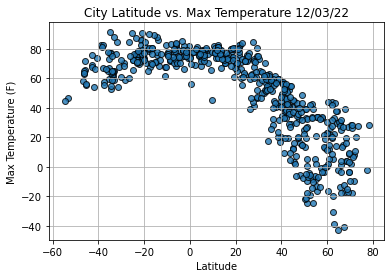

In [14]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()